In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
c = cosine_similarity(x)

In [ ]:
c

array([[1. , 0.8],
       [0.8, 1. ]])

In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
!git clone https://github.com/codeheroku/Introduction-to-Machine-Learning.git

Cloning into 'Introduction-to-Machine-Learning'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 537 (delta 3), reused 0 (delta 0), pack-reused 529
Receiving objects: 100% (537/537), 24.07 MiB | 9.83 MiB/s, done.
Resolving deltas: 100% (172/172), done.
Checking out files: 100% (356/356), done.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Introduction-to-Machine-Learning/Building a Movie Recommendation Engine/movie_dataset.csv')

In [ ]:
##clean the data
##feature engineering
##modelling


RangeIndex(start=0, stop=4803, step=1)

In [ ]:
import GlobalLibrary as G

importing Jupyter notebook from /nbs/GlobalLibrary.ipynb


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


  Created wheel for pandasvault: filename=pandasvault-0.0.3-cp36-none-any.whl size=6493 sha256=5d410bc0fdf838d82bd3b32737fb875aaa476b62f83bf60041a8c7cd793c7b6c
  Stored in directory: /root/.cache/pip/wheels/ae/6a/ee/1f31529eeba2dda5cffc612d17d4395ceadd1d8c51bec99688
Successfully built pandasvault


In [ ]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [ ]:
cols = ['keywords','cast','genres','director']

The Number Features which have missing values are :  4


keywords    412
cast         43
director     30
genres       28
dtype: int64

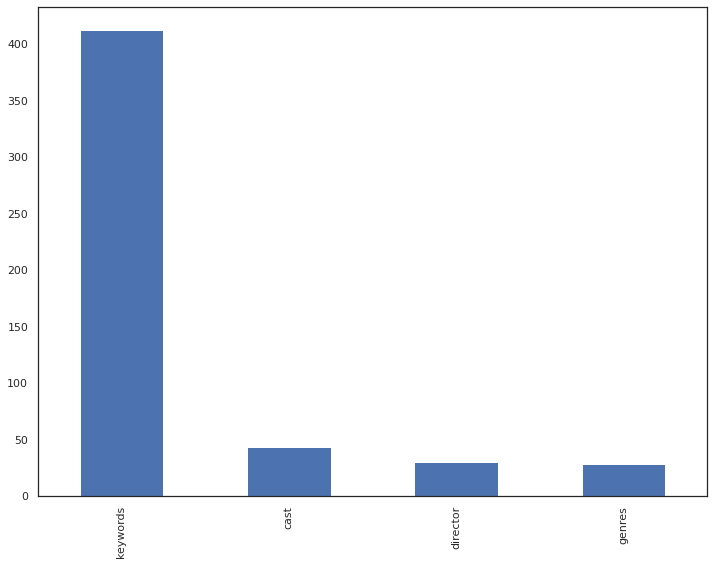

In [ ]:
G.show_missing1(df)

In [ ]:
df.columns

Index(['keywords', 'cast', 'genres', 'director'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keywords  4391 non-null   object
 1   cast      4760 non-null   object
 2   genres    4775 non-null   object
 3   director  4773 non-null   object
dtypes: object(4)
memory usage: 150.2+ KB


In [ ]:
def get_title_from_index(index):
  return df[df.index == index]['title'].values[0]

def get_index_from_title(title):
  return df[df.title == title]['index'].values[0]


In [ ]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [ ]:
for feature in cols:
  df[feature].fillna('',inplace=True)

In [ ]:
df.isnull().sum()

index                      0
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
director                   0
dtype: int64

In [ ]:
def combine_features(row):
  try:
    return row["cast"]+row["director"]+row["keywords"]+row["genres"]
  except:
    print("Error Row",row)
    

In [ ]:
df["combined_features"] = df.apply(combine_features,axis=1)

In [ ]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(df["combined_features"])
cosine_sim = cosine_similarity(count_matrix)


In [ ]:
movie_user_likes = "Avatar"


In [ ]:
movie_index = get_index_from_title(movie_user_likes)

similar_movies =  list(enumerate(cosine_sim[movie_index]))

## Step 7: Get a list of similar movies in descending order of similarity score
sorted_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)

## Step 8: Print titles of first 50 movies
i=0
for element in sorted_similar_movies:
		print(get_title_from_index(element[0]))
		i=i+1
		if i>50:
			break

Avatar
Guardians of the Galaxy
Alien
Star Trek Beyond
Planet of the Apes
Moonraker
Aliens
Memoirs of an Invisible Man
Star Wars: Clone Wars: Volume 1
The Astronaut's Wife
Space Dogs
Star Trek Into Darkness
Wing Commander
Babylon A.D.
Galaxina
Oblivion
Titan A.E.
Jason X
Galaxy Quest
The Ice Pirates
Alien³
Jupiter Ascending
John Carter
Cargo
The Wolverine
Damnation Alley
Men in Black
Sheena
The Helix... Loaded
Men in Black II
Treasure Planet
Source Code
Spaceballs
Captain America: The Winter Soldier
Lost in Space
The Right Stuff
Stargate: The Ark of Truth
Star Trek
Sunshine
The Thing
Silent Running
Red Planet
AVP: Alien vs. Predator
Zathura: A Space Adventure
Dragonball Evolution
The Empire Strikes Back
Time Bandits
Trekkies
American Hero
Iron Man 3
Terminator Salvation
